### Задача 1

Что выведет этот код?

Ответом на эту задачу является выведенное число, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_data, y_data = load_breast_cancer(return_X_y=True)

print(cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=42, random_state=42), X_data, y_data, cv=3).mean())

0.964847303444


### Задача 2

Напишите свою функцию определения качества модели по следующей метрике: максимальный precision, при условии, что $precision < 1.5 * recall$ и $recall > 0.5$ и определите наилучшее её значение, перебирая гиперпараметры по предложенной сетке

Ответом на эту задачу является максимальное значение качества по предложенной метрике, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer


param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['entropy', 'gini']
}

X_data, y_data = load_breast_cancer(return_X_y=True)

estimator = RandomForestClassifier(random_state=42)

#print('Accuracy best params and score')
#result = GridSearchCV(estimator, param_grid, cv=3, scoring='accuracy').fit(X_data, y_data)
#print('\tParams:', result.best_params_)
#print('\tScore:', result.best_score_)

from sklearn.metrics import precision_recall_curve
def score_func(y, y_pred):
    precision, recall, _ = precision_recall_curve(y, y_pred[:, 1])
    return precision[(precision < 1.5 * recall) & (recall > 0.5)].max()

scorer = make_scorer(score_func, greater_is_better=True, needs_proba=True)

print('Custom loss best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring=scorer).fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Custom loss best params and score
	Params: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
	Score: 0.994201509037


### Задача 3

Какова минимальная сторона квадрата с параллельными осям сторонами, содержащего все точки из $X$? 

Ответом на эту задачу является число, округлённое до 2го знака, дробная часть отделяется точкой.

In [17]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, :2]

max_x = max([x[0] for x in X])
max_y = max([x[1] for x in X])
min_x = min([x[0] for x in X])
min_y = min([x[1] for x in X])
        
width = max_x - min_x
height = max_y - min_y


In [18]:
from scipy.optimize import minimize
import numpy as np

minimize(lambda point: np.abs(point - X).max() * 2, np.mean(X, axis=0), method='Nelder-Mead')

max(*(X.max(axis=0) - X.min(axis=0)))

29.57

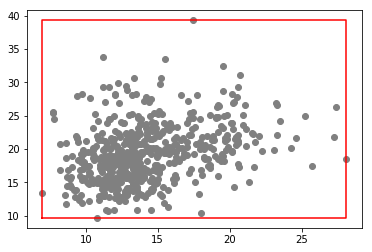

In [19]:
import matplotlib.pyplot as plt
plt.scatter([x[0] for x in X], [x[1] for x in X], color='gray')
plt.plot([min_x, max_x, max_x, min_x, min_x ], [min_y, min_y, max_y, max_y, min_y], color='red')
plt.show()

In [46]:
width

21.128999999999998